**Nguyễn Hữu Thuận 19146400**

In [ ]:
from keras.layers.core.dropout import Dropout
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.datasets import cifar100
from keras.models import Sequential
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from keras.layers import Dense, Conv2D, MaxPooling2D, Activation, Flatten, Dropout
import cv2
from tensorflow.keras.optimizers import SGD, Adam, Adadelta, Adagrad, Adamax, RMSprop
from tensorflow.keras.layers import Activation, Dense, Flatten, Dropout, BatchNormalization, PReLU
from tensorflow.keras.initializers import GlorotUniform, Constant, he_uniform
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.losses import CategoricalCrossentropy
from talos.model.normalizers import lr_normalizer

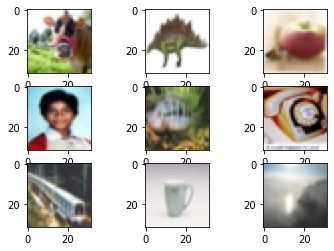

Kích thước x_train:  (50000, 32, 32, 3)
Kích thước y_train:  (50000, 1)
Kích thước x_test:  (10000, 32, 32, 3)
Kích thước y_test:  (10000, 1)


In [ ]:
#Chia dữ liệu
(x_train, y_train),(x_test,y_test) = cifar100.load_data()
for i in range(9):
  plt.subplot(330+1+i)
  plt.imshow(x_train[i])
plt.show()
print('Kích thước x_train: ', x_train.shape)
print('Kích thước y_train: ', y_train.shape)
print('Kích thước x_test: ', x_test.shape)
print('Kích thước y_test: ', y_test.shape)


In [ ]:
#Chuẩn hóa dữ liệu
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train/255
x_test = x_test/255


print('Kích thước x_train: ', x_train.shape)
print('Kích thước y_train: ', y_train.shape)
print('Kích thước x_test: ', x_test.shape)
print('Kích thước y_test: ', y_test.shape)

Kích thước x_train:  (50000, 32, 32, 3)
Kích thước y_train:  (50000, 1)
Kích thước x_test:  (10000, 32, 32, 3)
Kích thước y_test:  (10000, 1)


In [ ]:
y_train = np_utils.to_categorical(y_train,100)
y_test = np_utils.to_categorical(y_test,100)
print('Kích thước y_train: ', y_train.shape)

Kích thước y_train:  (50000, 100)


In [ ]:
#tao 
model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer = 'he_uniform',
          padding = 'same', input_shape = (32,32,3)))
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer = 'he_uniform',
          padding = 'same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3), activation='relu',kernel_initializer = 'he_uniform',padding = 'same',input_shape=(32,32,3)))
model.add(Conv2D(64,(3,3), activation='relu',kernel_initializer = 'he_uniform',padding = 'same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3), activation='relu',kernel_initializer = 'he_uniform',padding = 'same',input_shape=(32,32,3)))
model.add(Conv2D(128,(3,3), activation='relu',kernel_initializer = 'he_uniform',padding = 'same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(100, activation = 'softmax'))

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_16 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_18 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                 

In [ ]:
#tao modle
opt = SGD(lr=0.01, momentum=0.9)

model.compile(optimizer=opt,loss='categorical_crossentropy',  metrics=['accuracy'])

#train 
history = model.fit(x_train, y_train, batch_size=128,epochs=30,
                    validation_data = (x_test, y_test), verbose=1)      
#luu model
model.save('NHT_Cifar100.h5')

Epoch 1/30
391/391 [==============================] - 7s 17ms/step - loss: 4.1124 - accuracy: 0.0765 - val_loss: 3.6664 - val_accuracy: 0.1359
Epoch 2/30
391/391 [==============================] - 6s 15ms/step - loss: 3.4153 - accuracy: 0.1807 - val_loss: 3.2474 - val_accuracy: 0.2143
Epoch 3/30
391/391 [==============================] - 7s 18ms/step - loss: 2.9939 - accuracy: 0.2587 - val_loss: 3.0079 - val_accuracy: 0.2681
Epoch 4/30
391/391 [==============================] - 6s 15ms/step - loss: 2.6415 - accuracy: 0.3293 - val_loss: 2.7390 - val_accuracy: 0.3132
Epoch 5/30
391/391 [==============================] - 6s 15ms/step - loss: 2.3498 - accuracy: 0.3911 - val_loss: 2.5295 - val_accuracy: 0.3580
Epoch 6/30
391/391 [==============================] - 6s 16ms/step - loss: 2.0611 - accuracy: 0.4506 - val_loss: 2.4888 - val_accuracy: 0.3784
Epoch 7/30
391/391 [==============================] - 6s 15ms/step - loss: 1.7664 - accuracy: 0.5185 - val_loss: 2.5516 - val_accuracy: 0.3827

In [ ]:
#load model 
from tensorflow import keras
model = keras.models.load_model('NHT_Cifar100.h5')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

Sai số kiểm tra là:  5.735015392303467
Độ chính xác kiểm tra là:  0.3889000117778778


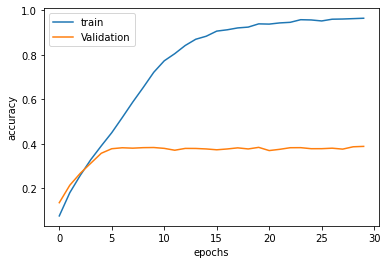

In [ ]:
#ve do thi
score = model.evaluate(x_test,y_test,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()

In [ ]:
from google.colab import files
uploaded=files.upload()

TypeError: ignored

In [ ]:
class_names=['concho','conmeo','conga']

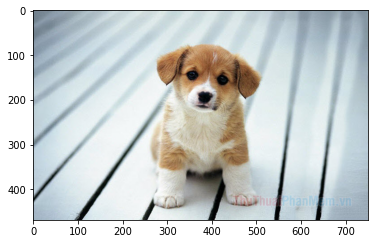

In [ ]:
img_path = '../content/concho.jpg'
plt.imshow(load_img(img_path))
img = cv2.imread(img_path)
new_img = cv2.resize(img, (256, 256))
new_img = np.reshape(new_img, [1, 256, 256, 3])

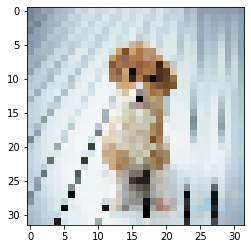

In [ ]:
# example of converting an image with the Keras API
from keras.preprocessing import image 
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
from json import load

img=load_img('concho.jpg',target_size=(32,32))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,32,32,3)
img=img.astype('float32')
img=img/255
convat=np.argmax(model.predict(img),axis=1)

In [ ]:
pred = model.predict(img)
print(np.argmax(pred))
if(convat>0):
  print("concho");

3
concho
